<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Guided Practice: Explore Python Data Visualization

_Authors: Alexander Combs (New York City), Dave Yerrington (San Francisco), and Kevin Markham (Washington, D.C.)_

---

In this guided practice lab you will use Pandas, Matplotlib, and Seaborn to create simple plots.

We'll cover plotting line plots, scatter plots, bar plots, and histograms, and how to manipulate the style of your plots with Matplotlib.

## Learning Objectives

- **Practice** using different types of plots.
- **Use** Pandas methods for plotting.
- **Create** line plots, bar plots, histograms, and box plots.
- **Know** when to use Seaborn or advanced Matplotlib

## Lesson Guide

- [Line Plots](#line-plots)
- [Bar Plots](#bar-plots)
- [Histograms](#histograms)
    - [Grouped Histograms](#grouped-histograms)
    
    
- [Box Plots](#box-plots)
    - [Grouped Box Plots](#grouped-box-plots)
    
- [Scatter Plots](#scatter-plots)
- [Using Seaborn](#using-seaborn)
- [OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)](#matplotlib)
- [OPTIONAL: Additional Topics](#additional-topics)

- [Summary](#summary)

### Introduction

In this lab, we will introduce how plotting works in Pandas and Matplotlib. It is important to know that Pandas uses Matplotlib behind the scenes to make plots. So, you will notice that Pandas plotting methods often use similar parameter names as Matplotlib methods. Further, you can use Matplotlib functions in combination with Pandas methods to alter the plots after drawing them. For example, you can use Matplotlib's `xlabel` and `title` functions to label the plot's x-axis and title, respectively, after it is drawn.

As we explore different types of plots, notice:

1. Different types of plots are drawn very similarly -- they even tend to share parameter names.
2. In Pandas, calling `plot()` on a `DataFrame` is different than calling it on a `Series`. Although the methods are both named `plot`, they may take different parameters.

Toward the end of the lab, we will show some motivational plots using Seaborn, a popular statistics plotting library, as well as go more in-depth about how Matplotlib works.

### Pandas Plotting Documentation

[Link to Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Create fake data for examples.

In [57]:
df = pd.DataFrame(np.random.randn(10, 4), 
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

### Choosing the right type of visualization

The choice of visualization should depend what you are trying to show. Here is a helpful flowchart that you can use to determine the best type of visualizations.

![Chart Suggestions](../assets/images/chart_suggestions.png)

### Load in data sets for visualization examples.

The Boston data dictionary can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [58]:
# Read in the Boston housing data.

housing = pd.read_csv('boston_housing_data.CSV')
# Read in the drinks data.
drinks= pd.read_csv('drinks.CSV')

# Read in the ufo data.
ufo= pd.read_csv('ufo.CSV')

<a id="line-plots"></a>
## Line plots: Show the trend of a numerical variable over time
---

- **Objective:** **Use** Pandas methods for plotting.
- **Objective:** **Create** line plots, bar plots, histograms, and box plots.

#### UFOs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [19]:
drinks.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [20]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [21]:
# Count the number of ufo reports each year (and sort by year).
ufo['year']=pd.to_datetime(ufo['Time']).dt.year 


In [23]:
ufo[['year']].apply(pd.Series.value_counts)

,year
2012,7263
2013,7003
2014,5382
2011,5089
2008,4655
...,...
1936,2
1930,2
1935,1
1933,1


In [69]:
ufo.year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
        ... 
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: year, Length: 82, dtype: int64

<AxesSubplot:>

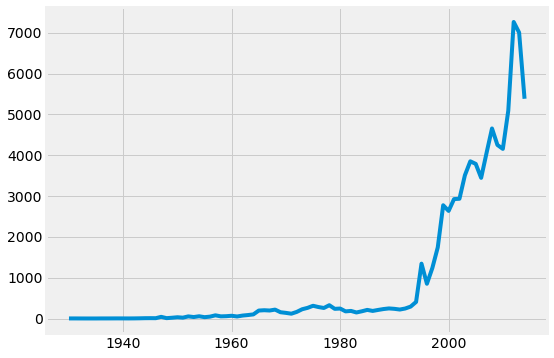

In [70]:
ufo.year.value_counts().sort_index().plot()

In [22]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,year
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,1930
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,1930
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,1931
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,1933


<AxesSubplot:>

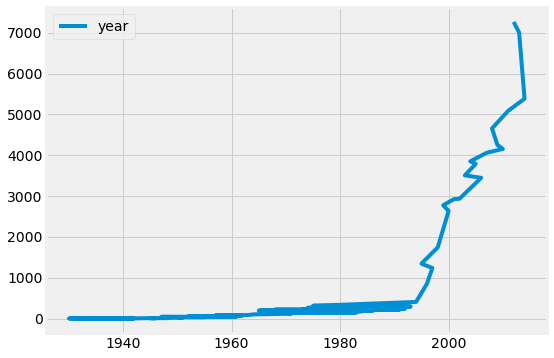

In [25]:
# Compare with line plot -- UFO sightings by year. (Ordering by year makes sense.)

ufo[['year']].apply(pd.Series.value_counts).plot()

#### Drinks

In [ ]:
# COMMON MISTAKE: Don't use a line plot when the x-axis cannot be ordered sensically!

# For example, ordering by continent below shows a trend where no exists ... 
#    it would be just as valid to plot the continents in any order.

# So, a line plot is the wrong type of plot for this data.
# Always think about what you're plotting and if it makes sense.


In [28]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


**Important:** A line plot is the wrong type of plot for this data. Any set of countries can be rearranged misleadingly to illustrate a negative trend, as we did here. Due to this, it would be more appropriate to represent this data using a bar plot, which does not imply a trend based on order.

In [71]:
# Plot the same data as a (horizontal) bar plot -- a much better choice!



In [72]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

### Line Plot With a `DataFrame`

#### DF

<AxesSubplot:>

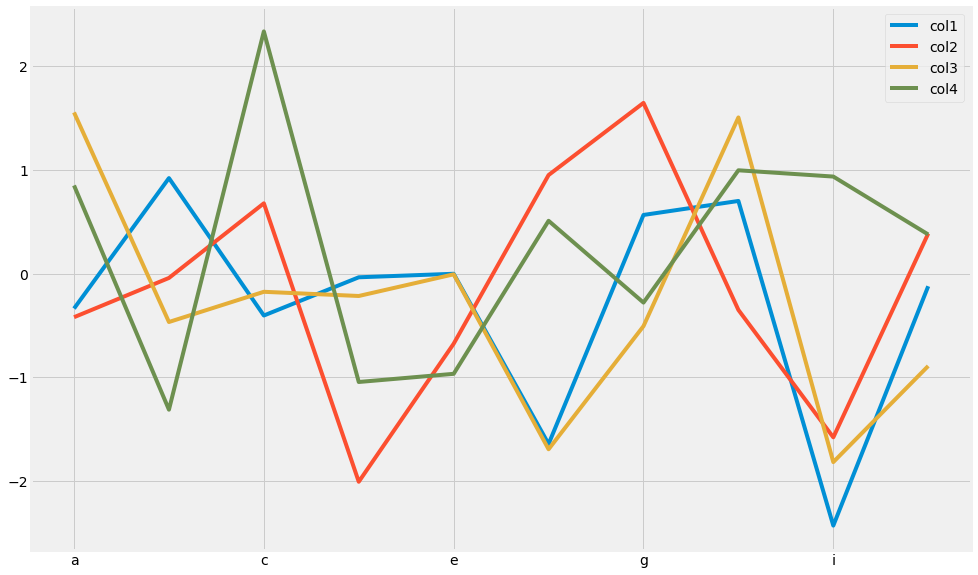

In [75]:
df.plot(figsize=(15,10))

### How to change the size of a plot

In [ ]:
# Technically the figsize is 15 "inches" (width) by 8 "inches" (height)
#   The figure is specified in inches for printing -- you set a dpi (dots/pixels per inch) elsewhere

### How to change the color of a plot

### How to change the style of individual lines

In [ ]:
# : - dotted line, v - triangle_down
# r - red, b - blue



### Challenge: Create a line plot of `ZN` and `INDUS` in the housing data. 

- For `ZN`, use a solid green line. For `INDUS`, use a blue dashed line.
- Change the figure size to a width of 12 and height of 8.
- Change the style sheet to something you find [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

In [ ]:
with plt.style
housing[['zn', 'indus']].plotsyle

<a id="bar-plots"></a>
## Bar Plots: Show a numerical comparison across different categories
---

### Drinks

In [56]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [59]:
# Count the number of countries in each continent.
drinks.continent.value_counts()


AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

<AxesSubplot:>

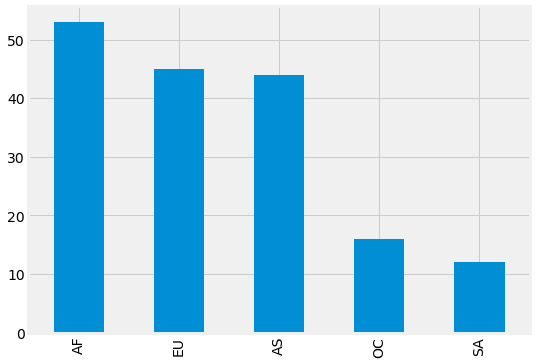

In [61]:
# Compare with bar plot.
drinks.continent.value_counts().plot.bar()

<AxesSubplot:xlabel='continent'>

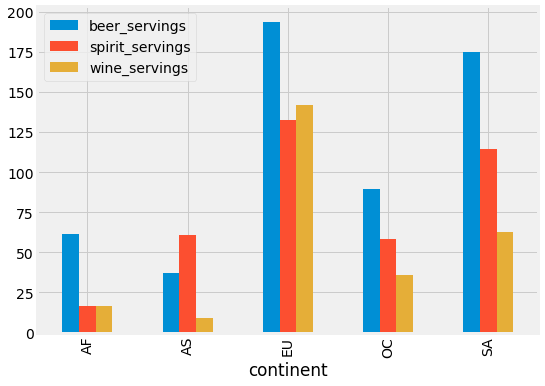

In [76]:
# Calculate the mean beverage amounts for each continent.

drinks[['beer_servings','spirit_servings','wine_servings','continent']].groupby('continent').mean().plot.bar()


In [77]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


<AxesSubplot:xlabel='continent'>

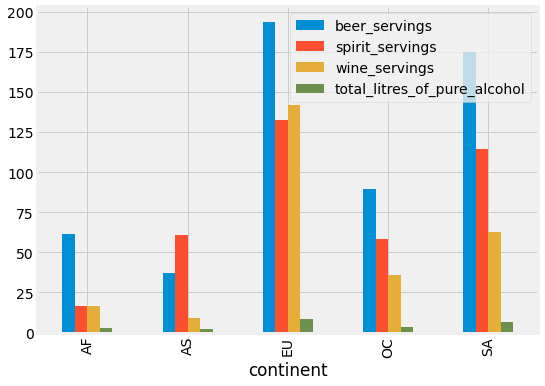

In [78]:
drinks.groupby('continent').mean().plot.bar()

In [ ]:
# Side-by-side bar plots


In [79]:
# Sort the continent x-axis by a particular column.
drinks.groupby('continent').mean().sort_values('beer_servings')

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AS,37.045455,60.840909,9.068182,2.170455
AF,61.471698,16.339623,16.264151,3.007547
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333
EU,193.777778,132.555556,142.222222,8.617778


<AxesSubplot:xlabel='continent'>

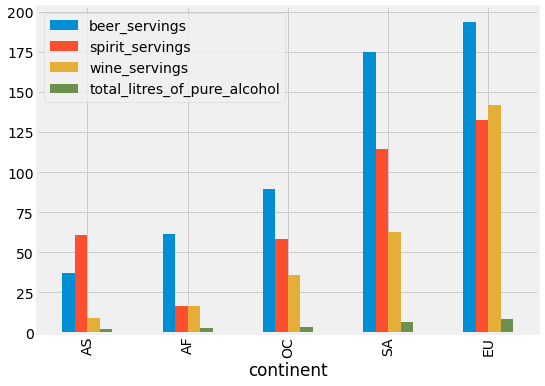

In [80]:
# Sort the continent x-axis by a particular column.
drinks.groupby('continent').mean().sort_values('beer_servings').plot.bar()

<AxesSubplot:xlabel='continent'>

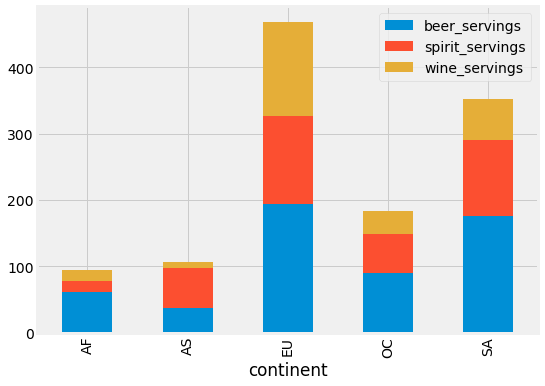

In [86]:
# Stacked bar plot (with the liters comparison removed!)
drinks.groupby('continent').mean().drop('total_litres_of_pure_alcohol', axis=1).plot(kind= 'bar', stacked =True)

### Using a `DataFrame` and Matplotlib commands, we can get fancy.

### DF

### Challenge: Create a bar chart using `col1` and `col2`.

- Give the plot a large title of your choosing. 
- Move the legend to the lower-left corner.

- Do the same thing but with horizontal bars.
- Move the legend to the upper-right corner.

### Stacked works on horizontal bar charts.

<a id="histograms"></a>
## Histograms: Show the distribution of a numerical variable
---


### Drinks

In [4]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [45]:
# Sort the soda column and mentally split it into three groups.

drinks['beer_servings'].sort_values()

0        0
40       0
79       0
90       0
97       0
      ... 
135    343
65     346
62     347
45     361
117    376
Name: beer_servings, Length: 193, dtype: int64

<AxesSubplot:ylabel='Frequency'>

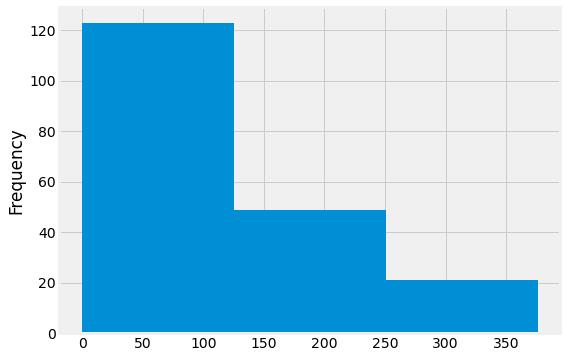

In [44]:
# Compare the above with histogram.
# About how many of the points above are in the groups 1-125, 125-250, and 250-376?
drinks['beer_servings'].sort_values().plot (kind='hist',bins =3)

<AxesSubplot:ylabel='Frequency'>

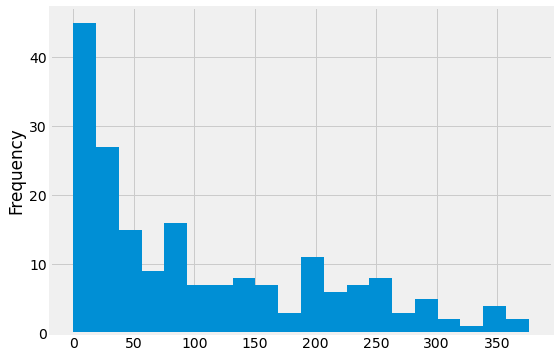

In [42]:
# Try more bins — it takes the range of the data and divides it into 20 evenly spaced bins.
drinks['beer_servings'].sort_values().plot(kind = 'hist', bins =20)

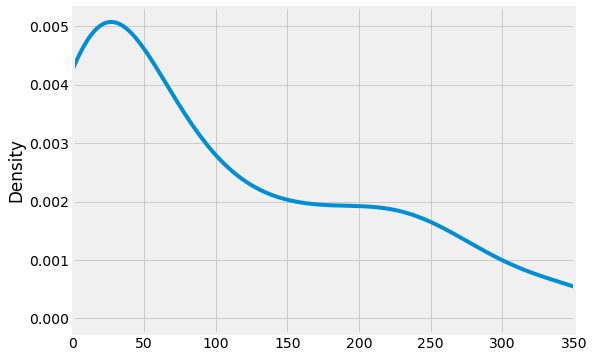

In [48]:
# Compare with density plot (smooth version of a histogram).
drinks['beer_servings'].plot(kind='density', xlim=(0, 350));

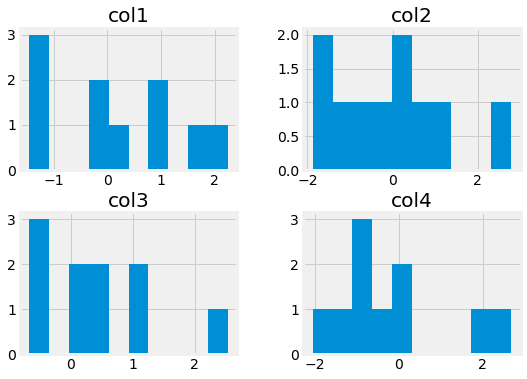

In [65]:
# Making histograms of DataFrames — histogram of random data
df.hist();

### Single Histogram

In [61]:
norm = np.random.standard_normal(5000)

In [62]:
norm

array([-0.05443719, -0.82537981,  0.24018394, ..., -0.29872059,
        0.90731018,  0.60665191])

### Another bins example: Sometimes the binning makes the data look different or misleading.

### Challenge: Create a histogram with pandas for using `MEDV` in the housing data.
- Set the bins to 20.

<a id="grouped-histograms"></a>
### Grouped histograms: Show one histogram for each group.

### Drinks

In [ ]:
# Reminder: Overall histogram of soda servings

continent
AF    AxesSubplot(0.08,0.125;0.87x0.755)
AS    AxesSubplot(0.08,0.125;0.87x0.755)
EU    AxesSubplot(0.08,0.125;0.87x0.755)
OC    AxesSubplot(0.08,0.125;0.87x0.755)
SA    AxesSubplot(0.08,0.125;0.87x0.755)
dtype: object

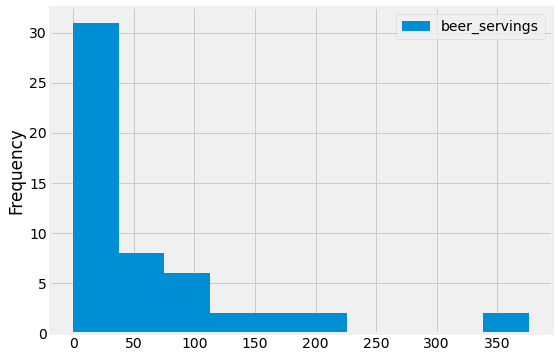

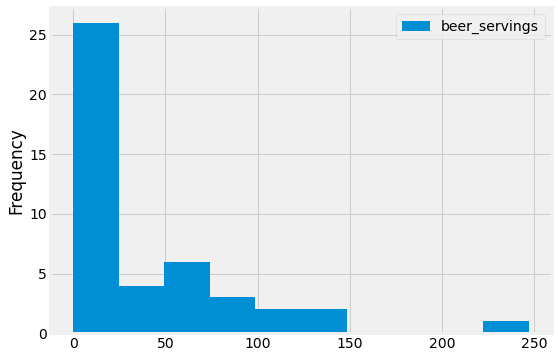

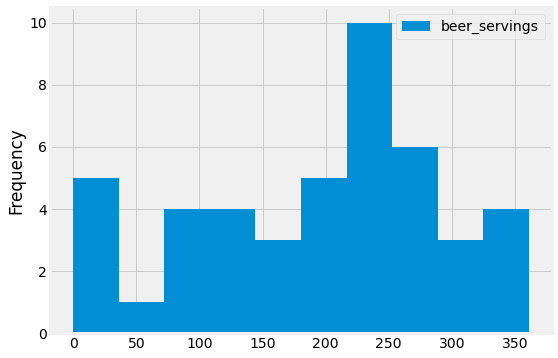

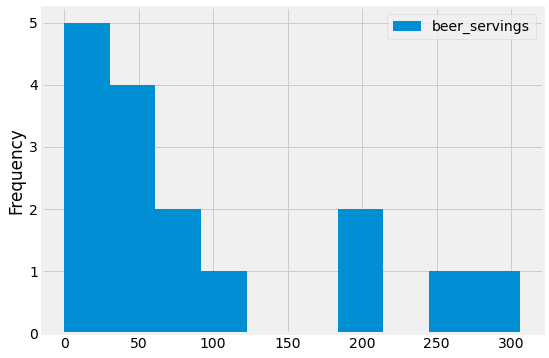

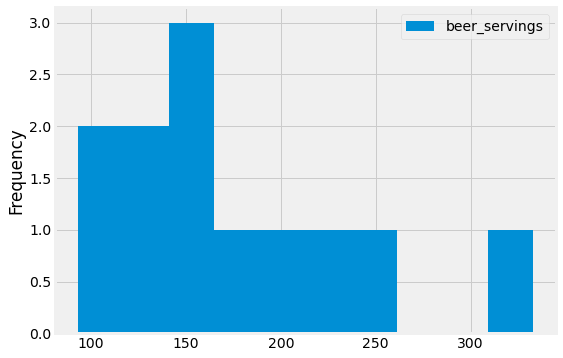

In [94]:
# Histogram of soda servings grouped by continent -- how might these graphs be misleading?
drinks[['beer_servings','continent']].groupby('continent').plot(kind='hist')


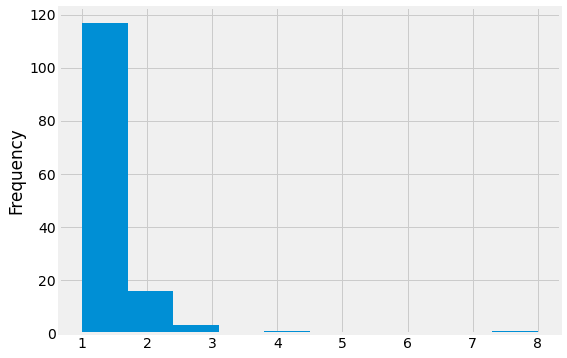

In [88]:
drinks.groupby("continent")['beer_servings'].value_counts().plot(kind='hist');

Text(0, 0.5, 'beer_servings')

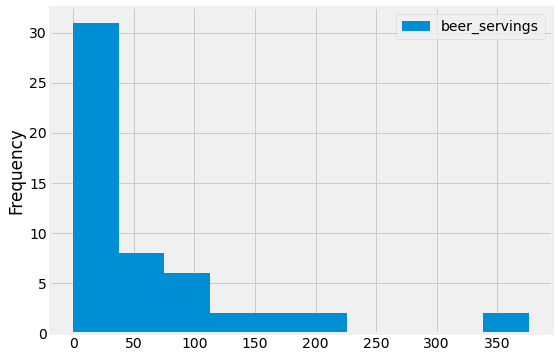

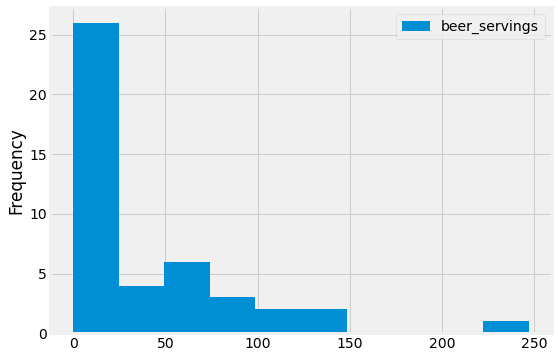

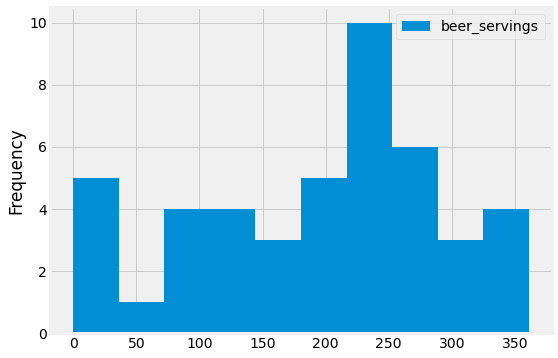

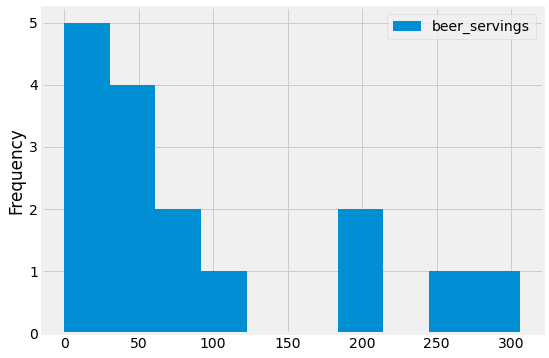

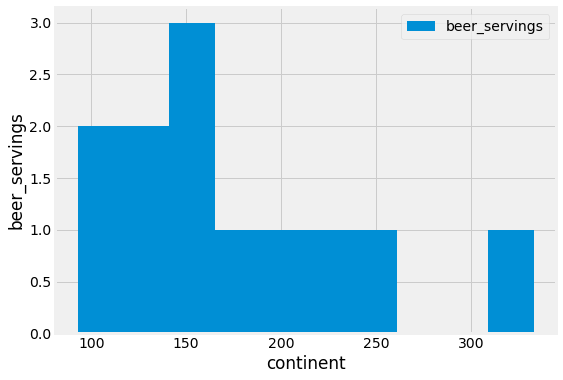

In [97]:
# Share the x- and y-axes.   

# Adjust layout if you wish to see the output in a different (row, column) combo
drinks[['beer_servings','continent']].groupby('continent').plot(kind='hist')
plt.xlabel('continent')
plt.ylabel('beer_servings')


<a id="box-plots"></a>
## Box Plots: Show quartiles (and outliers) for one or more numerical variables
---

We can use boxplots to quickly summarize distributions.

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(It's more useful than mean and standard deviation for describing skewed distributions.)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

### Let's see how box plots are generated so we can best interpret them.

### Drinks

In [98]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [100]:
# Sort the coffee column.
drinks.spirit_servings.sort_values()

0        0
27       0
128      0
118      0
111      0
      ... 
144    315
73     326
141    326
15     373
68     438
Name: spirit_servings, Length: 193, dtype: int64

In [104]:
# Show "five-number summary" for coffee.
drinks.spirit_servings.describe()


count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit_servings, dtype: float64

<AxesSubplot:>

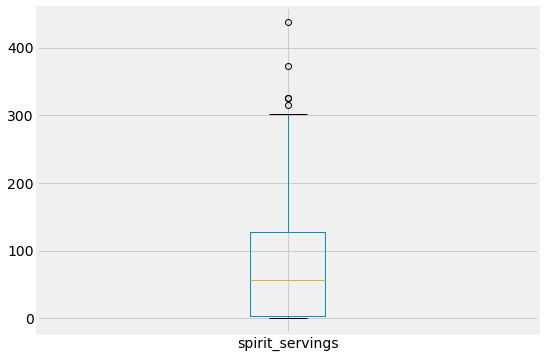

In [106]:
# Compare with box plot.
drinks.spirit_servings.plot.box()

In [ ]:
# Include multiple variables.


### How to use a box plot to preview the distributions in the housing data

<AxesSubplot:>

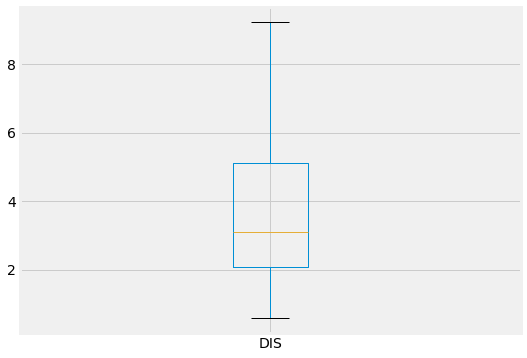

In [110]:
housing.DIS.plot.box()

<a id="grouped-box-plots"></a>
### Grouped box plots: Show one box plot for each group.

### Drinks

In [ ]:
# Reminder: box plot of beer servings


continent
AF    AxesSubplot(0.08,0.125;0.87x0.755)
AS    AxesSubplot(0.08,0.125;0.87x0.755)
EU    AxesSubplot(0.08,0.125;0.87x0.755)
OC    AxesSubplot(0.08,0.125;0.87x0.755)
SA    AxesSubplot(0.08,0.125;0.87x0.755)
dtype: object

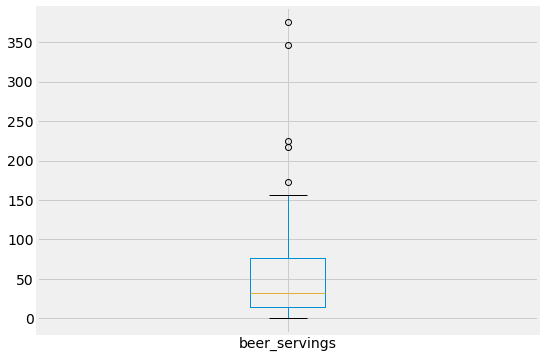

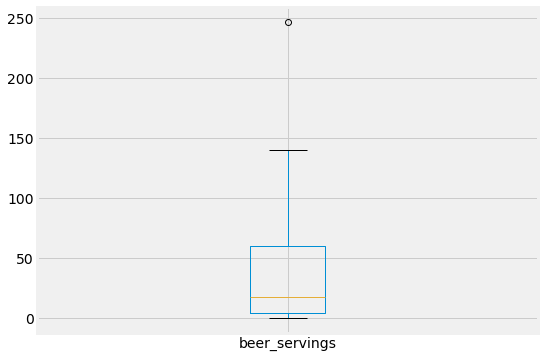

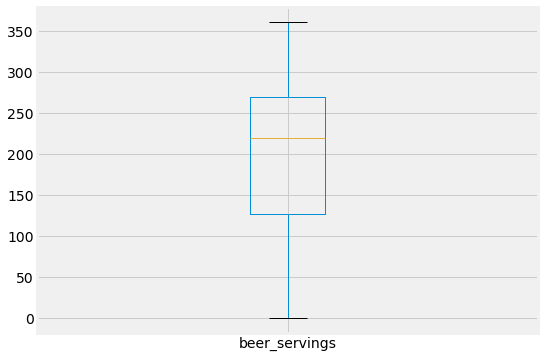

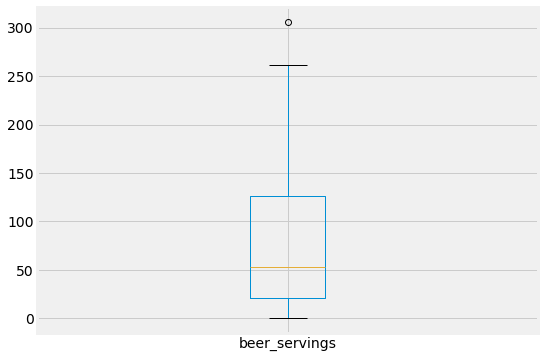

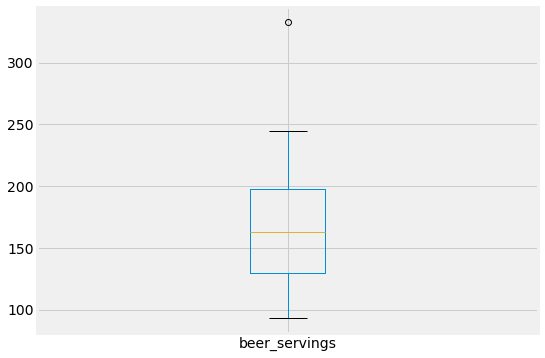

In [112]:
# Box plot of soda servings grouped by continent
drinks[['beer_servings','continent']].groupby('continent').plot.box()

In [ ]:
# Box plot of all numeric columns grouped by continent

# .tight_layout() only considers ticklabels, axis labels, and titles. It does not address
# the supratitle. Thus, other artists may be clipped and also may overlap. 
# Adjust subplot geometry by passing in a list to the "rect=" paramter


<a id="scatter-plots"></a>
## Scatter plots: Show the relationship between two numerical variables
---


### Drinks

In [114]:
# Select the soda and tea columns and sort by soda.
drinks[['beer_servings','wine_servings']].sort_values(by = 'beer_servings')

,beer_servings,wine_servings
0,0,0
40,0,74
79,0,0
90,0,0
97,0,0
...,...,...
135,343,56
65,346,175
62,347,59
45,361,134


<AxesSubplot:xlabel='beer_servings', ylabel='wine_servings'>

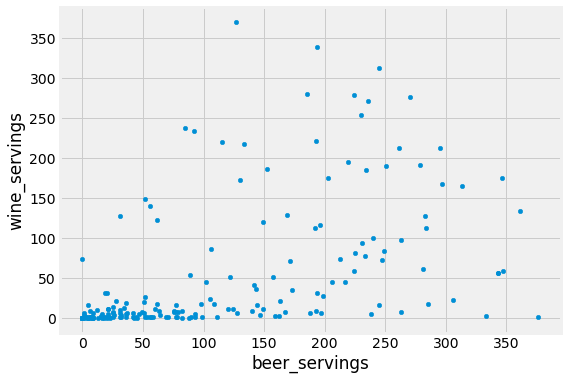

In [122]:
# Compare with scatter plot.
drinks[['beer_servings','wine_servings']].sort_values(by = 'beer_servings').plot(kind ='scatter', x='beer_servings',y='wine_servings')

<AxesSubplot:xlabel='beer_servings', ylabel='wine_servings'>

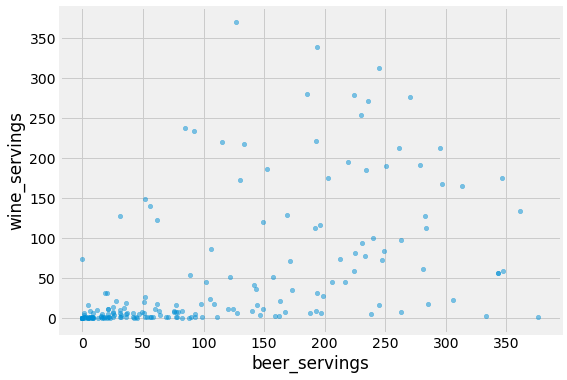

In [123]:
# Add transparency (great for plotting several graphs on top of each other, 
# or for illustrating density!)
drinks[['beer_servings','wine_servings']].sort_values(by = 'beer_servings').plot(kind ='scatter', x='beer_servings',y='wine_servings', alpha=0.5)

<AxesSubplot:xlabel='beer_servings', ylabel='wine_servings'>

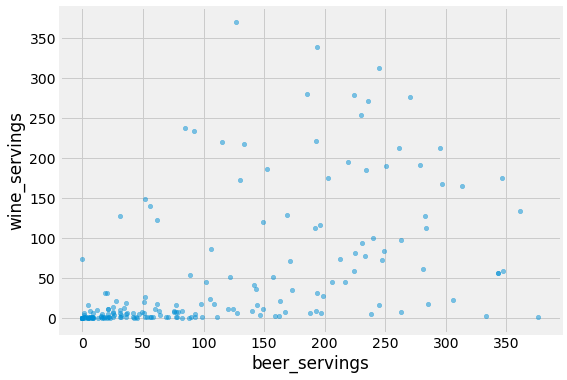

In [128]:
# Vary point color by coffee servings.

drinks[['beer_servings','spirit_servings','wine_servings',]].sort_values(by = 'beer_servings').plot(kind ='scatter', x='beer_servings',y='wine_servings', alpha=0.5)



<AxesSubplot:xlabel='beer_servings', ylabel='wine_servings'>

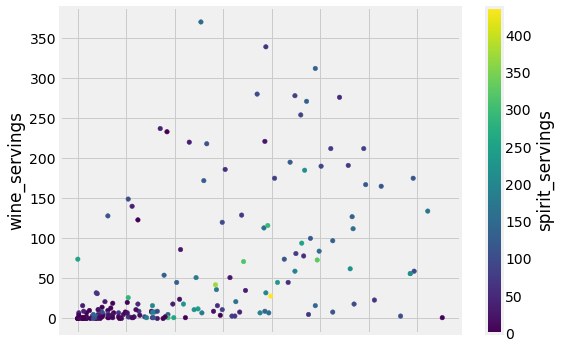

In [132]:
drinks.plot(kind='scatter', x='beer_servings', y='wine_servings', c='spirit_servings', colormap= 'viridis')


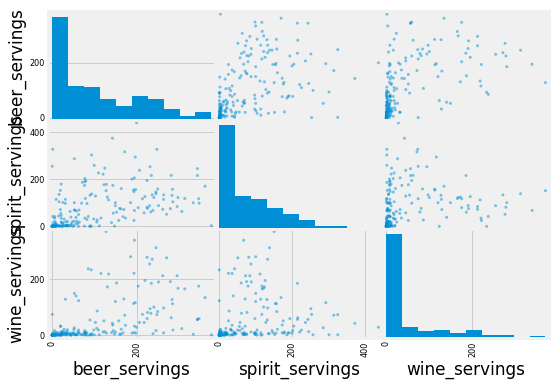

In [144]:
# Scatter matrix of three numerical columns
pd.plotting.scatter_matrix(drinks[['beer_servings','spirit_servings','wine_servings']]);

### Plotting `DataFrames`

### How to view the association between the variables `ZN` and `INDUS` using a scatter plot (Housing)

### How to use a list comprehension to change the size of the scatter plot dots based on `DIS`

In [ ]:
# This list comprehension sets the point sizes ('s') to be the squares of the values in housing['DIS']


<a id="seaborn"></a>
## Seaborn `pairplot`

---

- **Objective:** Know when to use Seaborn or advanced Matplotlib.

With the `DataFrame` object `housing`, we will render a pairplot using the Seaborn library.
What do each of the elements represent? Is this more or less useful than the previous plot?

**Answer:** _What do each of the elements represent?  Is this more or less useful than the previous plot?_
> In a pair plot we get to see every relationship between every _pair_ of variables.  We can see this is very useful for quickly discovering which variables have some kind of correlation during an exploratory data analysis.  However, when just looking at the `INDUS` feature, the pair plot is more difficult to read and interpret as opposed to the single histogram.  

## Seaborn `heatmap`
---

When you have too many variables, a pairplot or scatter matrix can become impossible to read. We can still gauge linear correlation using a heatmap of the correlation matrix.

In [ ]:
# Make a heatmap on the correlations between variables in the housing data:


### Challenge: Create a scatter plot of two heatmap entries that appear to have a very positive correlation.

- Now, create a scatter plot of two heatmap entries that appear to have negative correlation.

<a id="matplotlib"></a>
## OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)

---

Matplotlib uses a blank canvas called a figure.

In [ ]:
fig = plt.subplots(1,1, figsize=(16,8));

Within this canvas, we can contain smaller objects called axes.

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(16,8));

Pandas allows us to plot to a specified axes if we pass the object to the ax parameter.

## Let's use a bit more customization.
---

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(16,8))

# We can change the ticks' size.
df['col2'].plot(figsize=(16,4), color='purple', fontsize=21, ax=axes[0][0])

# We can also change which ticks are visible.
# Let's show only the even ticks. ('idx % 2 == 0' only if 'idx' is even.)
ticks_to_show = [idx for idx, _ in enumerate(df['col2'].index) if idx % 2 == 0]
df['col2'].plot(figsize=(16,4), color='purple', xticks=ticks_to_show, fontsize=16, ax=axes[0][1])

# We can change the label rotation.
df.plot(figsize=(15,7), title='Big Rotated Labels - Tiny Title',\
        fontsize=20, rot=-50, ax=axes[1][0])\

# We have to use ".set_title()" to fix title size.
df.plot(figsize=(16,8), fontsize=20, rot=-50, ax=axes[1][1])\
       .set_title('Better-Sized Title', fontsize=21, y=1.01);

<a id="additional-topics"></a>
## OPTIONAL: Additional Topics

In [ ]:
# Saving a plot to a file
drinks.soda.plot(kind='hist', bins=20, title='Histogram of Soda Servings');
plt.xlabel('Soda Servings');
plt.ylabel('Frequency');


In [ ]:
# List available plot styles


In [ ]:
# Change to a different style.


<a id="summary"></a>
### Summary

In this lesson, we showed examples how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

Do not be concerned if you do not remember everything — this will come with practice! Although there are many plot styles, many similarities exist between how each plot is drawn. For example, they have most parameters in common, and the same Matplotlib functions are used to modify the plot area.

We looked at:
- Line plots
- Bar plots
- Histograms
- Box plots
- Special seaborn plots
- How Matplotlib works